<a href="https://colab.research.google.com/github/LukaAndric/nans/blob/main/Kraj_nans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings (2).csv


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error, r2_score

# Učitavanje podataka
data = pd.read_csv("hotel_bookings.csv")

# Provera nedostajućih vrednosti
print(data.isnull().sum())

# Zamena nedostajućih vrednosti srednjom vrednošću
data['lead_time'].fillna(data['lead_time'].mean(), inplace=True)

# Provera ponovo da li postoje nedostajuće vrednosti
print(data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [117]:
data.dropna(subset = ['children', 'country', 'agent', 'company'], axis=0, inplace=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16


In [118]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/len(data)).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
hotel,0,0.0
is_canceled,0,0.0
reservation_status,0,0.0
total_of_special_requests,0,0.0
required_car_parking_spaces,0,0.0
adr,0,0.0
customer_type,0,0.0
days_in_waiting_list,0,0.0
company,0,0.0
agent,0,0.0


In [119]:
data_new = data[['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status', 'reservation_status_date']]

In [120]:

data_new['hotel']=data_new['hotel'].astype('category')
data_new['is_canceled']=data_new['is_canceled'].astype('category')
data_new['arrival_date_month']=data_new['arrival_date_month'].astype('category')
data_new['meal']=data_new['meal'].astype('category')
data_new['country']=data_new['country'].astype('category')
data_new['market_segment']=data_new['market_segment'].astype('category')
data_new['distribution_channel']=data_new['distribution_channel'].astype('category')
data_new['is_repeated_guest']=data_new['is_repeated_guest'].astype('category')
data_new['reserved_room_type']=data_new['reserved_room_type'].astype('category')
data_new['assigned_room_type']=data_new['assigned_room_type'].astype('category')
data_new['booking_changes']=data_new['booking_changes'].astype('category')
data_new['deposit_type']=data_new['deposit_type'].astype('category')
data_new['agent']=data_new['agent'].astype('category')
data_new['company']=data_new['company'].astype('category')
data_new['customer_type']=data_new['customer_type'].astype('category')
data_new['reservation_status']=data_new['reservation_status'].astype('category')
data_new['reservation_status_date']=data_new['reservation_status_date'].astype('category')

<ipython-input-120-0841ae873056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['hotel']=data_new['hotel'].astype('category')
<ipython-input-120-0841ae873056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['is_canceled']=data_new['is_canceled'].astype('category')
<ipython-input-120-0841ae873056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [121]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   hotel                    217 non-null    category
 1   is_canceled              217 non-null    category
 2   arrival_date_month       217 non-null    category
 3   meal                     217 non-null    category
 4   country                  217 non-null    category
 5   market_segment           217 non-null    category
 6   distribution_channel     217 non-null    category
 7   is_repeated_guest        217 non-null    category
 8   reserved_room_type       217 non-null    category
 9   assigned_room_type       217 non-null    category
 10  booking_changes          217 non-null    category
 11  deposit_type             217 non-null    category
 12  agent                    217 non-null    category
 13  company                  217 non-null    category
 14  cust

In [122]:
data_new = pd.get_dummies(data_new, drop_first=True) #sve varijable deli na pod kategorije te varijable
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Columns: 214 entries, hotel_Resort Hotel to reservation_status_date_2017-08-27
dtypes: uint8(214)
memory usage: 47.0 KB


In [123]:
from sklearn.model_selection import train_test_split

# Odabir atributa
atributi = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'adr']
X = data[atributi]
y = data['is_canceled']

# Podela podataka na skupove za obuku i testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [124]:
#linearna regresija
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score:', r2_adj)
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

Mean squared error:  0.08199965209839445
Mean absolute error:  0.1559721511774325
Root mean squared error:  0.2863558138023296
R2 score:  0.007804209609426849
R2 adjusted score: -0.01937923670264352
    y    y_pred
0   0  0.080697
1   0  0.100100
2   0  0.100187
3   0  0.096398
4   0  0.098475
5   0  0.103499
6   0  0.098300
7   0  0.095902
8   0  0.088910
9   0  0.070294
10  0  0.103645
11  0  0.100333
12  0  0.100333
13  0 -0.023549
14  0  0.103499
15  0  0.100972
16  0  0.005969
17  0  0.103470
18  0  0.102009
19  0  0.098329


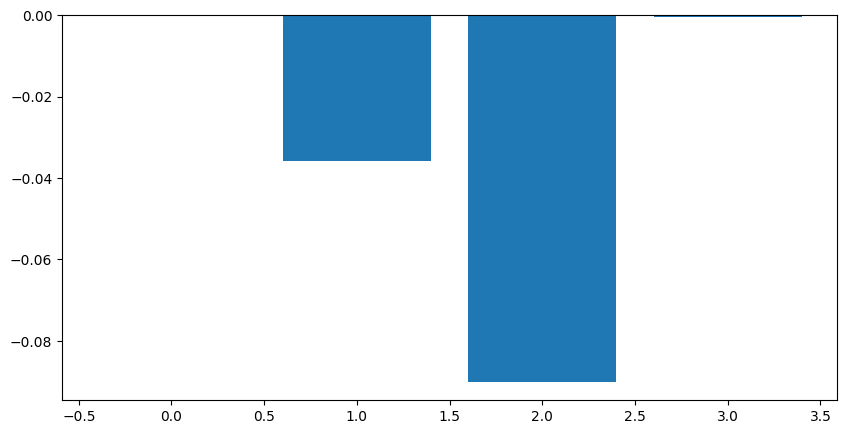

In [125]:
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)

# Obuka
first_regression_model.fit(X_train, y_train)

# Testiranje
y_predicted = first_regression_model.predict(X_test)

# Evaluacija
model_evaluation(y_test, y_predicted, X_train.shape[0], X_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()

In [ ]:
numeric_feats = [item for item in X.columns if 'wdir' not in item]
print(numeric_feats)
dummy_feats = [item for item in X.columns if 'wdir' in item]
print(dummy_feats)

In [127]:
#2 provera da bi r2 score bio pozitivniji
# Provera nedostajućih vrednosti
missing_values = data.isnull().sum()
print(missing_values)

# Zamena nedostajućih vrednosti srednjom vrednošću za 'lead_time'
data['lead_time'].fillna(data['lead_time'].mean(), inplace=True)

# Provera ponovo da li postoje nedostajuće vrednosti
missing_values_after = data.isnull().sum()
print(missing_values_after)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [130]:
# Recimo da dodamo dodatne atribute
dodatni_atributi = ['stays_in_weekend_nights', 'stays_in_week_nights']
X.loc[:, dodatni_atributi] = data[dodatni_atributi].copy()

# Ponovno podijelimo podatke na skupove za obuku i testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

<ipython-input-130-3204701d6a1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, dodatni_atributi] = data[dodatni_atributi].copy()


In [131]:
from sklearn.ensemble import RandomForestRegressor

# Inicijalizacija Random Forest Regressora
random_forest_model = RandomForestRegressor()

# Obuka modela
random_forest_model.fit(X_train, y_train)

# Testiranje modela
y_predicted_rf = random_forest_model.predict(X_test)

# Evaluacija modela
model_evaluation(y_test, y_predicted_rf, X_train.shape[0], X_train.shape[1])


Mean squared error:  0.06919855763286935
Mean absolute error:  0.1180771471794199
Root mean squared error:  0.2630561872164754
R2 score:  0.16269745264228075
R2 adjusted score: 0.1278098465023758
    y    y_pred
0   0  0.010000
1   0  0.264333
2   0  0.003542
3   0  0.000000
4   0  0.010000
5   0  0.112827
6   0  0.000000
7   0  0.143333
8   0  0.010000
9   0  0.010000
10  0  0.020000
11  0  0.000000
12  0  0.000000
13  0  0.170000
14  0  0.112827
15  0  0.000000
16  0  0.000000
17  0  0.224977
18  0  0.000000
19  0  0.000000


In [ ]:
# Ovi rezultati pokazuju da je model donekle bolji u poređenju sa prethodno korišćenim modelima.
# R2 skor je pozitivan i približava se vrednosti 0.

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definisanje parametara za pretragu
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Inicijalizacija Random Forest regresora
rf = RandomForestRegressor(random_state=42)

# Grid pretraga za optimizaciju hiperparametara
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Najbolji model
best_rf = grid_search.best_estimator_

# Evaluacija najboljeg modela
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Optimized Random Forest MSE: {mse_rf}")



Optimized Random Forest MSE: 0.07090421820656799


In [ ]:
#primetimo da se nije nesto poboljsalo sto nam govorili da moramo upotrebiti drugi algoritam

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

# Inicijalizacija Gradient Boosting Regressora
gradient_boosting_model = GradientBoostingRegressor()

# Obuka modela
gradient_boosting_model.fit(X_train, y_train)

# Testiranje modela
y_predicted_gb = gradient_boosting_model.predict(X_test)

# Evaluacija modela
model_evaluation(y_test, y_predicted_gb, X_train.shape[0], X_train.shape[1])

Mean squared error:  0.07260384699660838
Mean absolute error:  0.125834579650307
Root mean squared error:  0.26945101038335034
R2 score:  0.1214934513410384
R2 adjusted score: 0.08488901181358166
    y    y_pred
0   0  0.006451
1   0  0.278491
2   0 -0.001020
3   0 -0.003210
4   0 -0.015553
5   0  0.105545
6   0 -0.001828
7   0  0.232841
8   0  0.050279
9   0  0.003957
10  0 -0.035452
11  0 -0.001828
12  0 -0.001828
13  0  0.037877
14  0  0.105545
15  0 -0.000946
16  0 -0.010264
17  0  0.178068
18  0 -0.001782
19  0 -0.001828


In [136]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definisanje parametara za pretragu
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicijalizacija Gradient Boosting Regressora
gb_regressor = GradientBoostingRegressor(random_state=42)

# Grid pretraga za optimizaciju hiperparametara
grid_search_gb = GridSearchCV(gb_regressor, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

# Najbolji model
best_gb_model = grid_search_gb.best_estimator_

# Evaluacija najboljeg modela
y_pred_gb = best_gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Optimized Gradient Boosting Regressor MSE: {mse_gb}")

Optimized Gradient Boosting Regressor MSE: 0.071063937728692


In [ ]:
#********************************

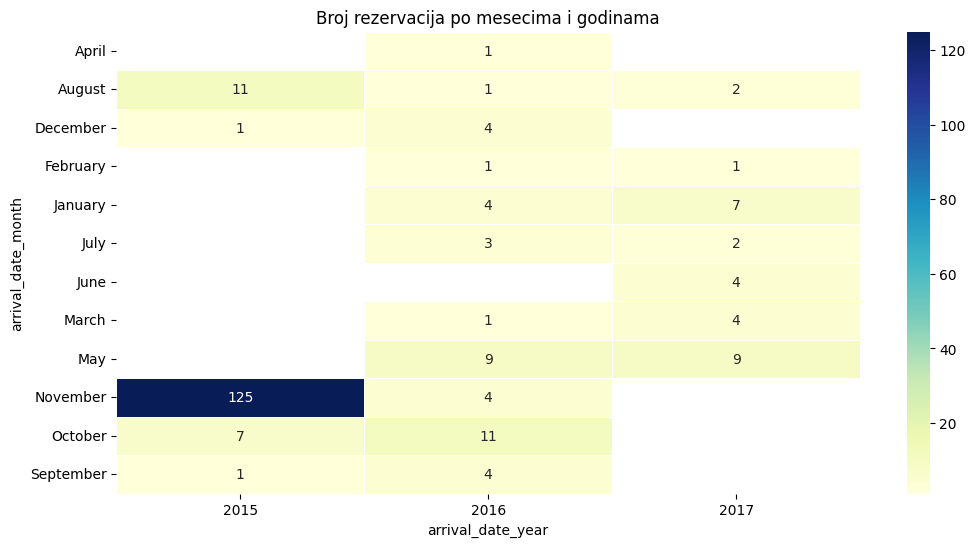

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

reservations_by_month_year = data.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='count')

# Kreiranje pivot tabele za bolju vizualizaciju
pivot_table = reservations_by_month_year.pivot(index='arrival_date_month', columns='arrival_date_year', values='count')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Broj rezervacija po mesecima i godinama')
plt.show()

<ipython-input-46-b36e95959881>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_month', y='total_cancelations', data=cancelations_by_month, palette='viridis')


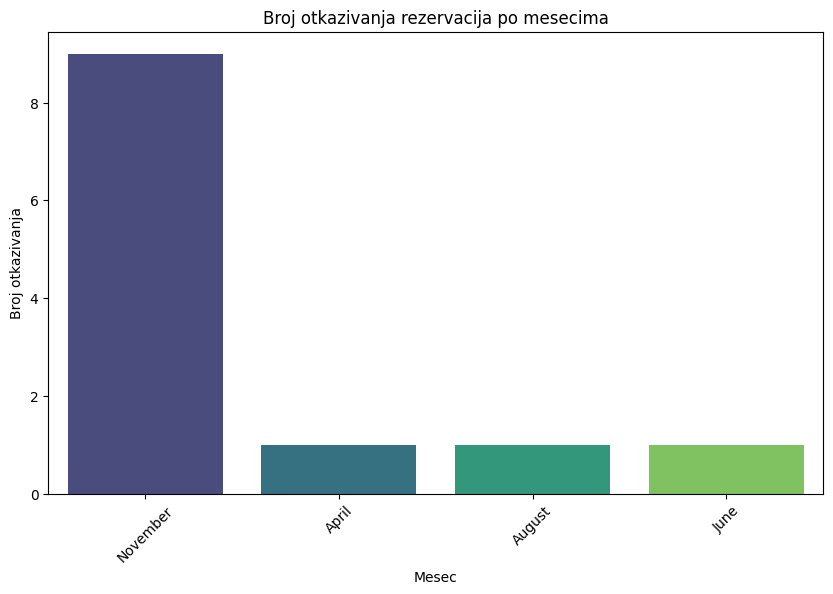

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

canceled_reservations = data[data['reservation_status'] == 'Canceled']

cancelations_by_month = canceled_reservations.groupby('arrival_date_month').size().reset_index(name='total_cancelations')

cancelations_by_month = cancelations_by_month.sort_values(by='total_cancelations', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_month', y='total_cancelations', data=cancelations_by_month, palette='viridis')
plt.title('Broj otkazivanja rezervacija po mesecima')
plt.xlabel('Mesec')
plt.ylabel('Broj otkazivanja')
plt.xticks(rotation=45)
plt.show()